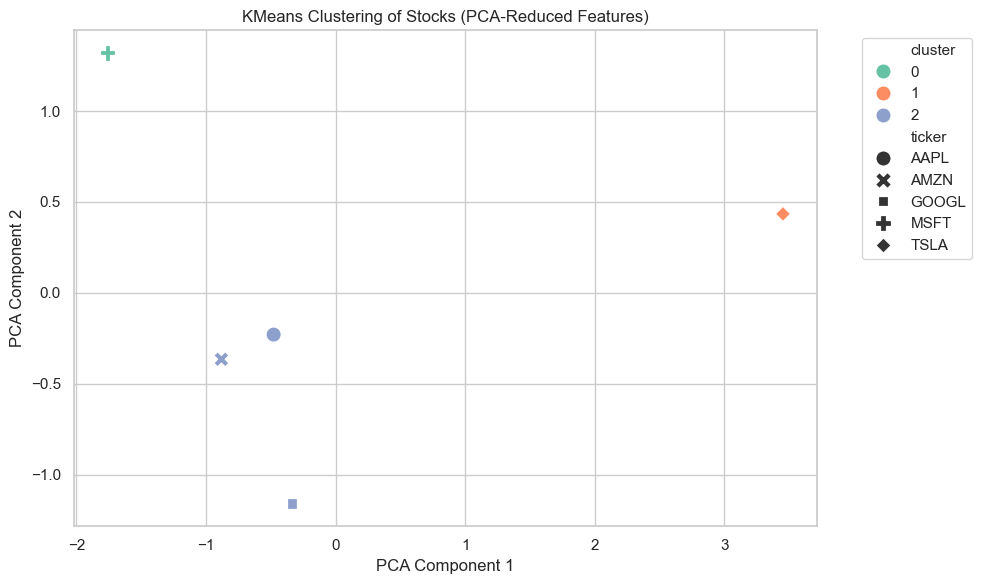

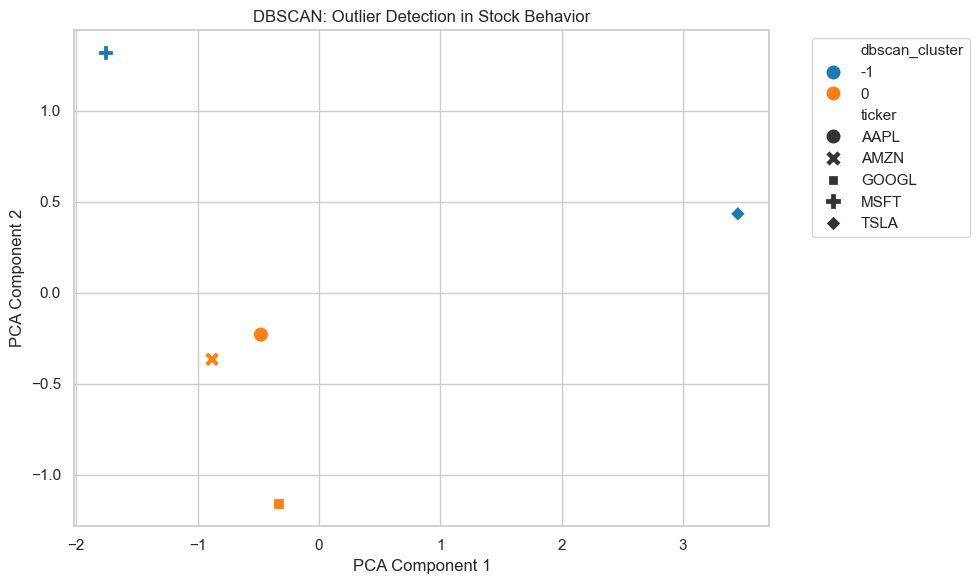

📊 KMeans Cluster Feature Averages:


,daily_return,volatility_7,volatility_30,cum_return
cluster,,,,
0,-0.0071,0.0101,0.0074,7242.7855
1,0.0252,0.0419,0.0423,267.6588
2,-0.0062,0.0124,0.0134,1578.6919


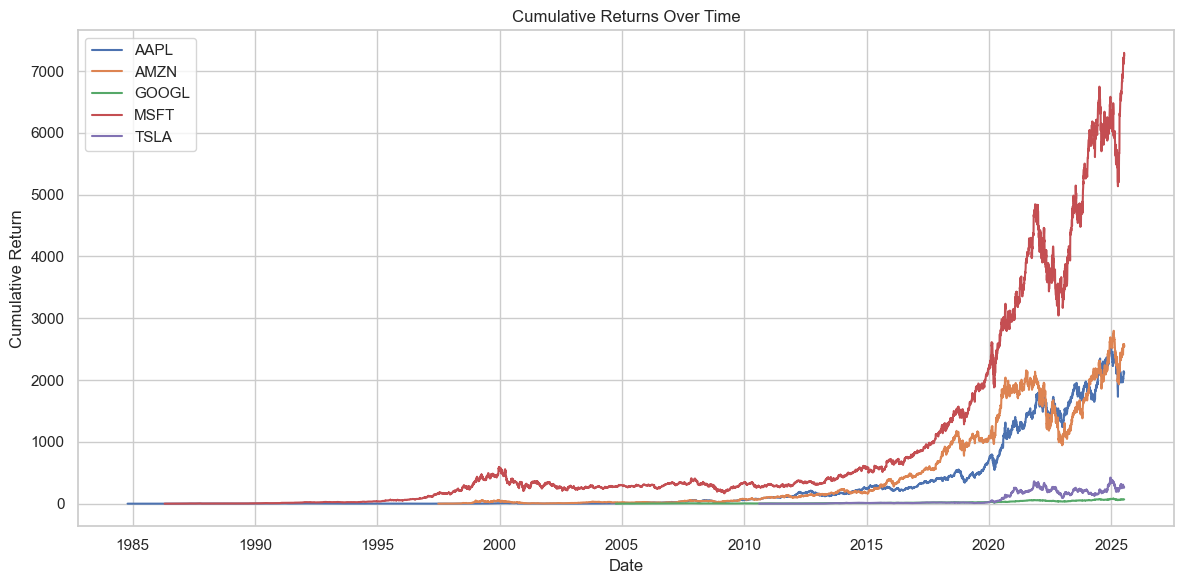

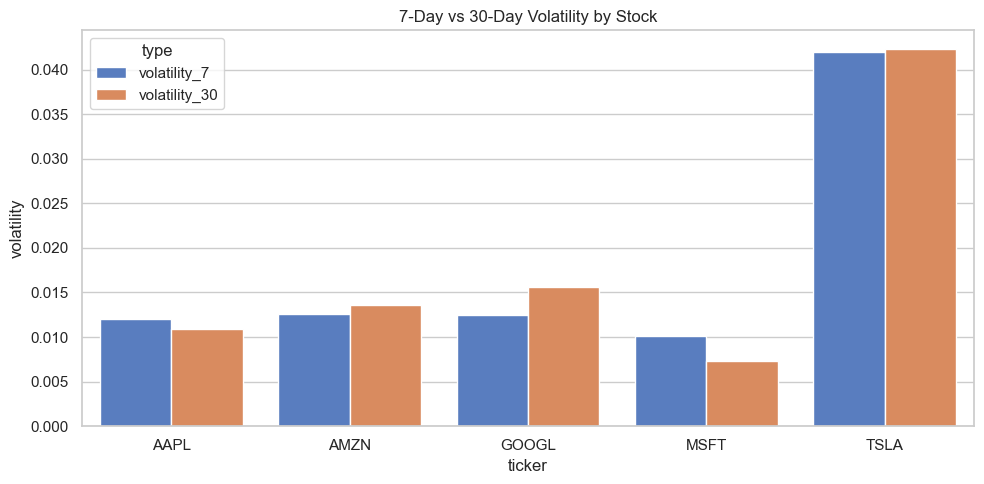

In [2]:
# 📊 Visualization of Stock Clustering Results
# Author: Rehan Chaudhry

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load clustered data
latest_data = pd.read_csv("../data/processed/clustered_latest_data.csv")  # Save this from 3_clustering.ipynb

# Set style
sns.set(style="whitegrid", context="notebook")

# -------------------------------
# 📍 1. PCA Scatter: KMeans Clusters
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=latest_data,
    x="pca1", y="pca2",
    hue="cluster",
    style="ticker",
    palette="Set2",
    s=120
)
plt.title("KMeans Clustering of Stocks (PCA-Reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------
# 🚨 2. PCA Scatter: DBSCAN with Outliers
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=latest_data,
    x="pca1", y="pca2",
    hue="dbscan_cluster",
    style="ticker",
    palette="tab10",
    s=120
)
plt.title("DBSCAN: Outlier Detection in Stock Behavior")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -------------------------------
# 🧱 3. Cluster Summary Table
# -------------------------------
summary = latest_data.groupby('cluster')[['daily_return', 'volatility_7', 'volatility_30', 'cum_return']].mean().round(4)
print("📊 KMeans Cluster Feature Averages:")
display(summary)

# -------------------------------
# 📈 4. Cumulative Return Line Plot
# -------------------------------
tickers = latest_data['ticker'].tolist()
plt.figure(figsize=(12, 6))

for ticker in tickers:
    df = pd.read_csv(f"../data/processed/{ticker}_features.csv")
    df['date'] = pd.to_datetime(df['date'])
    plt.plot(df['date'], df['cum_return'], label=ticker)

plt.title("Cumulative Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 📉 5. Volatility Comparison
# -------------------------------
volatility_data = latest_data[['ticker', 'volatility_7', 'volatility_30']].melt(id_vars='ticker', var_name='type', value_name='volatility')

plt.figure(figsize=(10, 5))
sns.barplot(data=volatility_data, x='ticker', y='volatility', hue='type', palette='muted')
plt.title("7-Day vs 30-Day Volatility by Stock")
plt.tight_layout()
plt.show()
